# Fixing the minimum depth in the topography of ACCESS-OM2-01, and ACCESS-OM2-1

In [1]:
import matplotlib.pyplot as plt
#import netCDF4
import cmocean as cm
import xarray as xr
import numpy as np
import IPython.display
import cartopy.crs as ccrs
import cartopy.feature as cft
import os

## Part 1: $0.1^o$ model

In [2]:
#importing the topography under KDS75 and KDS75_5mdz
KDS75_topo = xr.open_dataset('/g/data/ik11/inputs/access-om2/input_08022019/mom_01deg/topog.nc')

In [3]:
hgrid = xr.open_dataset('/g/data/ik11/inputs/access-om2/input_08022019/mom_01deg/ocean_hgrid.nc')
#hgrid.nxp.isel(nxp=slice(1,7201,2))
#hgrid.nyp.isel(nyp=slice(1,5401,2))
hgrid

<xarray.Dataset>
Dimensions:   (nyp: 5401, nxp: 7201, nx: 7200, ny: 5400)
Dimensions without coordinates: nyp, nxp, nx, ny
Data variables:
    tile      |S255 ...
    x         (nyp, nxp) float64 ...
    y         (nyp, nxp) float64 ...
    dx        (nyp, nx) float64 ...
    dy        (ny, nxp) float64 ...
    angle_dx  (nyp, nxp) float64 ...
    area      (ny, nx) float64 ...

In [4]:
#replacing_values lower than 25
KDS75_topo2 = KDS75_topo
#KDSmask=KDS75_topo.isnull()
KDS75_topo2 = KDS75_topo2.where((KDS75_topo2 >= 21.42501016313645) | (KDS75_topo2 == 0) | KDS75_topo2.isnull(),other=21.42501016313645)
KDS75_topo2 = KDS75_topo2.where(KDS75_topo2.notnull(),other=-1.e30)
KDS75_topo2.depth.attrs['minimum_depth'] = np.array(21.42501016313645)
KDS75_topo2.depth.attrs['minimum_levels']= np.int32(4)

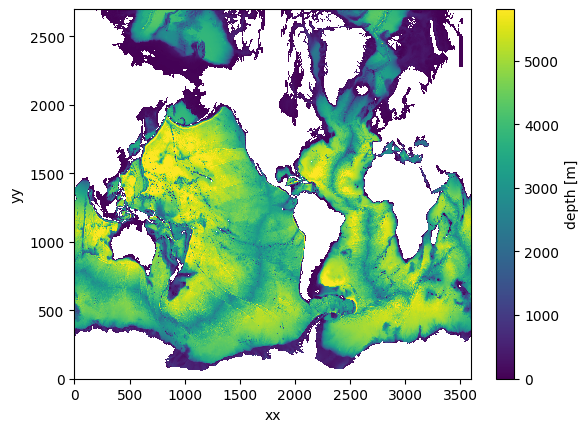

In [5]:
KDS75_topo['depth'].plot()

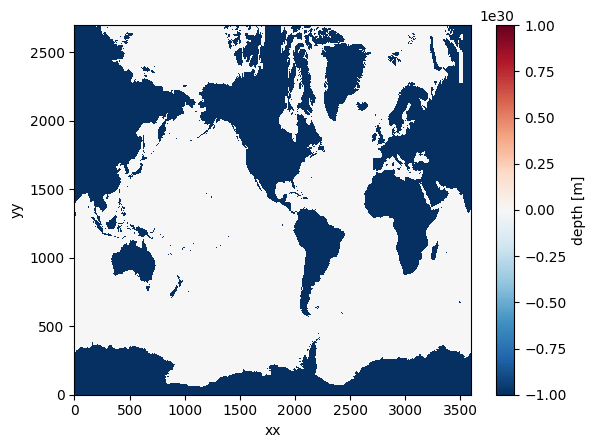

In [6]:
KDS75_topo2['depth'].plot()

In [7]:
KDS75_topo2['depth'].max()

<xarray.DataArray 'depth' ()>
array(5808.65673828)

In [8]:
Deltadepth=KDS75_topo2 -KDS75_topo
Deltadepth

<xarray.Dataset>
Dimensions:  (yy: 2700, xx: 3600)
Dimensions without coordinates: yy, xx
Data variables:
    depth    (yy, xx) float32 nan nan nan nan nan nan ... nan nan nan nan nan

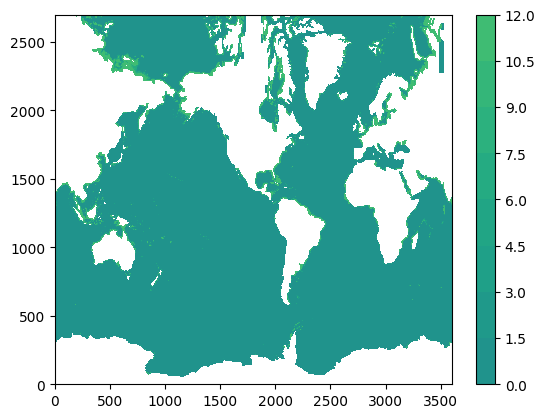

In [9]:
plt.contourf(Deltadepth['xx'],Deltadepth['yy'],Deltadepth['depth'],vmin=-30,vmax=30)
plt.colorbar()


In [10]:
#encoding = { 'depth': {'_FillValue': -1.e+30}}
#enc={"_FillValue": -1e30}
KDS75_topo2.depth.attrs['_FillValue']=-1.e+30
#KDS75_topo2.to_netcdf('/g/data/v45/wf4500/DSW_collaborative/topog_KDZ75_5mdz/topog_kds5mdz2.nc',encoding={"depth": enc})
#KDS75_topo2.to_netcdf('/g/data/v45/wf4500/DSW_collaborative/topog_KDZ75_5mdz/topog_kds5mdz2.nc')
#KDS75_topofinal = xr.open_dataset('/home/156/wf4500/access-om2-01/ryf/newtopo/topog_kds5mdz2.nc')

## Part 2: $0.25^o$ model

In [16]:
#importing the topography under KDS75 and KDS75_5mdz
OM2_025_topo = xr.open_dataset('/home/156/wf4500/access-om2-025/DSW_project/025_ryf_1mtop/025deg_jra55_ryf/localinput/original_topog.nc')


In [17]:
#OM2_025_hgrid = xr.open_dataset('/home/156/wf4500/access-om2-025/DSW_project/025_ryf_1mtop/025deg_jra55_ryf/localinput/ocean_hgrid.nc')


In [18]:
#replacing_values lower than 25
OM2_025_topo2 = OM2_025_topo.copy()
#KDSmask=KDS75_topo.isnull()
OM2_025_topo2 = OM2_025_topo2.where((OM2_025_topo2 >= 21.42501016313645) | (OM2_025_topo2 == 0) | OM2_025_topo2.isnull(),other=21.42501016313645)
OM2_025_topo2 = OM2_025_topo2.where(OM2_025_topo2.notnull(),other=-1.e30)
OM2_025_topo2.depth.attrs['minimum_depth'] = np.array(21.42501016313645)
OM2_025_topo2.depth.attrs['minimum_levels']= np.int32(4)



In [19]:
OM2_025_topo2.depth.where(OM2_025_topo2.depth>=0).min()

<xarray.DataArray 'depth' ()>
array(21.42501068)

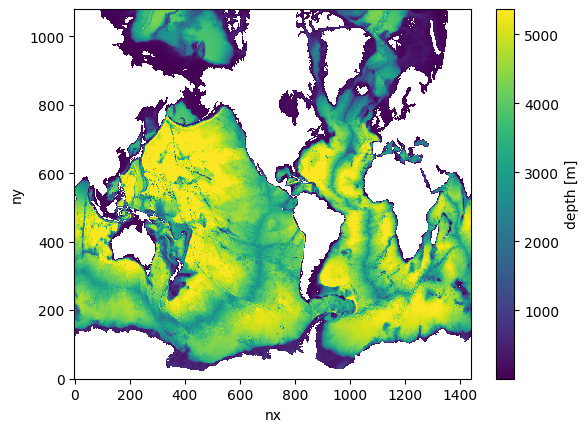

In [20]:
OM2_025_topo['depth'].plot()

In [21]:
OM2_025_topo2['depth'].max()

<xarray.DataArray 'depth' ()>
array(5363.46923828)

In [22]:
Deltadepth_OM2_025=OM2_025_topo2 -OM2_025_topo

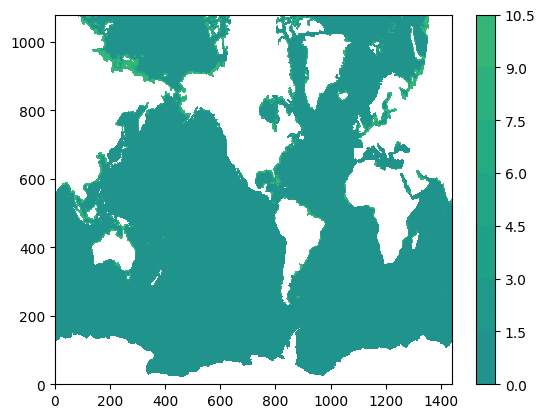

In [23]:
plt.contourf(Deltadepth_OM2_025['nx'],Deltadepth_OM2_025['ny'],Deltadepth_OM2_025['depth'],vmin=-30,vmax=30)
plt.colorbar()

In [24]:
OM2_025_topo2 = OM2_025_topo2.where(OM2_025_topo2>0).fillna(-9999)

In [25]:
OM2_025_topo2.depth.min()

<xarray.DataArray 'depth' ()>
array(-9999.)

In [ ]:
#try 1 values masked to -9999 + second option of flagging with -9999
#try 2 values masked to -9999 + first option of flagging with -9999
#try 3 copying new values into the old netcdf using ncks

In [14]:
encoding = { 'depth': {'_FillValue': -9999}}
enc={"_FillValue": -9999}
#OM2_025_topo2.depth.attrs['_FillValue']=-9999
OM2_025_topo2.to_netcdf('/home/156/wf4500/access-om2-025/DSW_project/025_ryf_1mtop/025deg_jra55_ryf/localinput/topog.nc',encoding={"depth": enc})
#OM2_025_topo2.to_netcdf('/home/156/wf4500/access-om2-025/DSW_project/025_ryf_1mtop/025deg_jra55_ryf/localinput/topog.nc')

